In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

data_file = 'DeepCool_Fan_302021-05-25 18-02-59.csv'

df = pd.read_csv(data_file)

df

,Time,Temperature set (C),Temperature measured (C)
0,144.878585,15.425270,19.362220
1,145.878837,15.459088,19.320818
2,146.878976,15.425270,19.033399
3,147.879194,15.414005,19.251978
4,148.878272,15.425270,19.156050
5,149.879202,15.425270,19.293252
6,150.879815,15.425270,19.224532
7,151.879537,15.425270,19.033399
8,152.879289,15.402740,18.965583
9,153.879405,15.402740,18.844109


In [20]:
window_size = 10
temp_set_rollling_avg= np.array(df.loc[:,'Temperature set (C)'].rolling(window = window_size, center = True).mean())
temp_measured_rollling_avg= np.array(df.loc[:,'Temperature measured (C)'].rolling(window = window_size, center = True).mean())

In [21]:
df['Temperature set (rolling mean) C'] = temp_set_rollling_avg
df['Temperature measured (rolling mean) C'] = temp_measured_rollling_avg

<IPython.core.display.Javascript object>


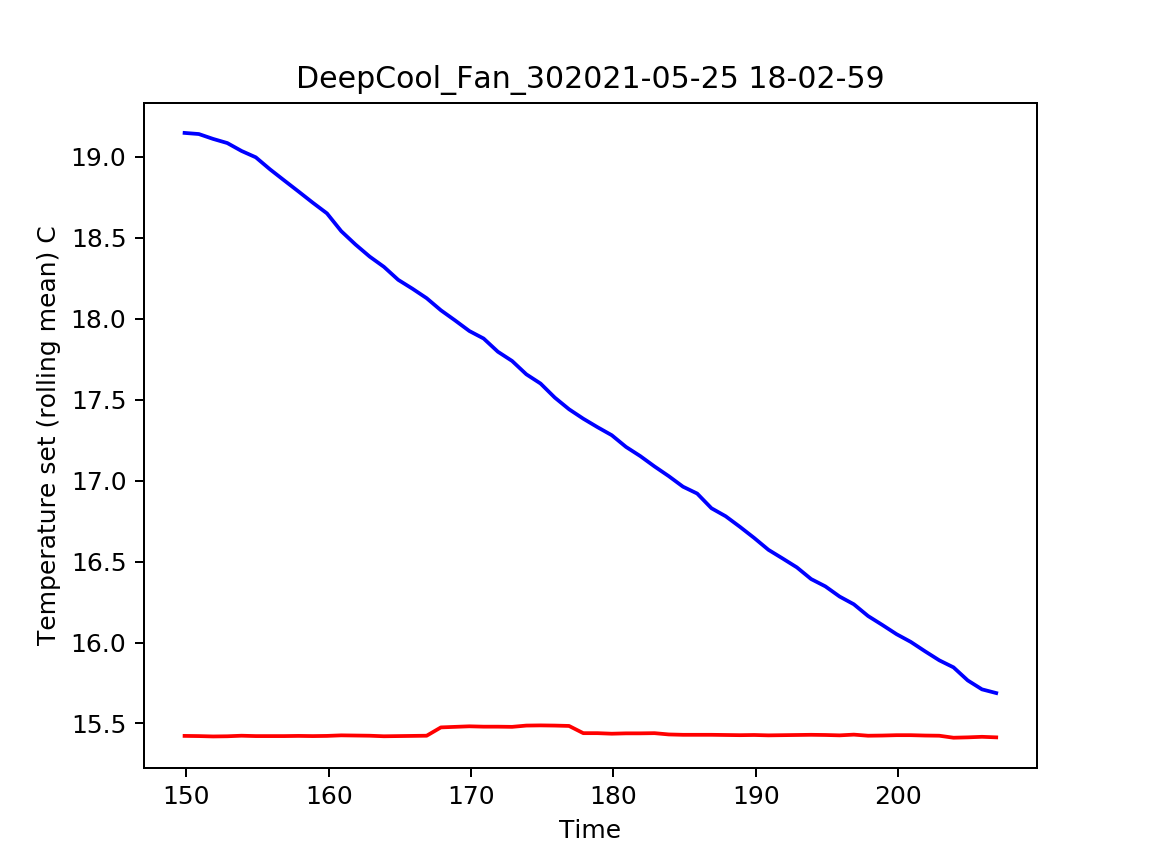

In [22]:
# Plot

plt.figure()
sns.lineplot(x = "Time", y = 'Temperature set (rolling mean) C', color = 'r', data =df)
sns.lineplot(x = "Time", y = 'Temperature measured (rolling mean) C', color = 'b', data = df)
plt.title(data_file[:-4])
# plt.savefig(data_file[:-4]+'.png', dpi = 300)
plt.show()

In [23]:
# Fit a line to estimate slope
p = np.polyfit(np.array(df["Time"]), np.array(df["Temperature measured (C)"]), deg = 1)
p[0]

-0.062306531037606624

<IPython.core.display.Javascript object>


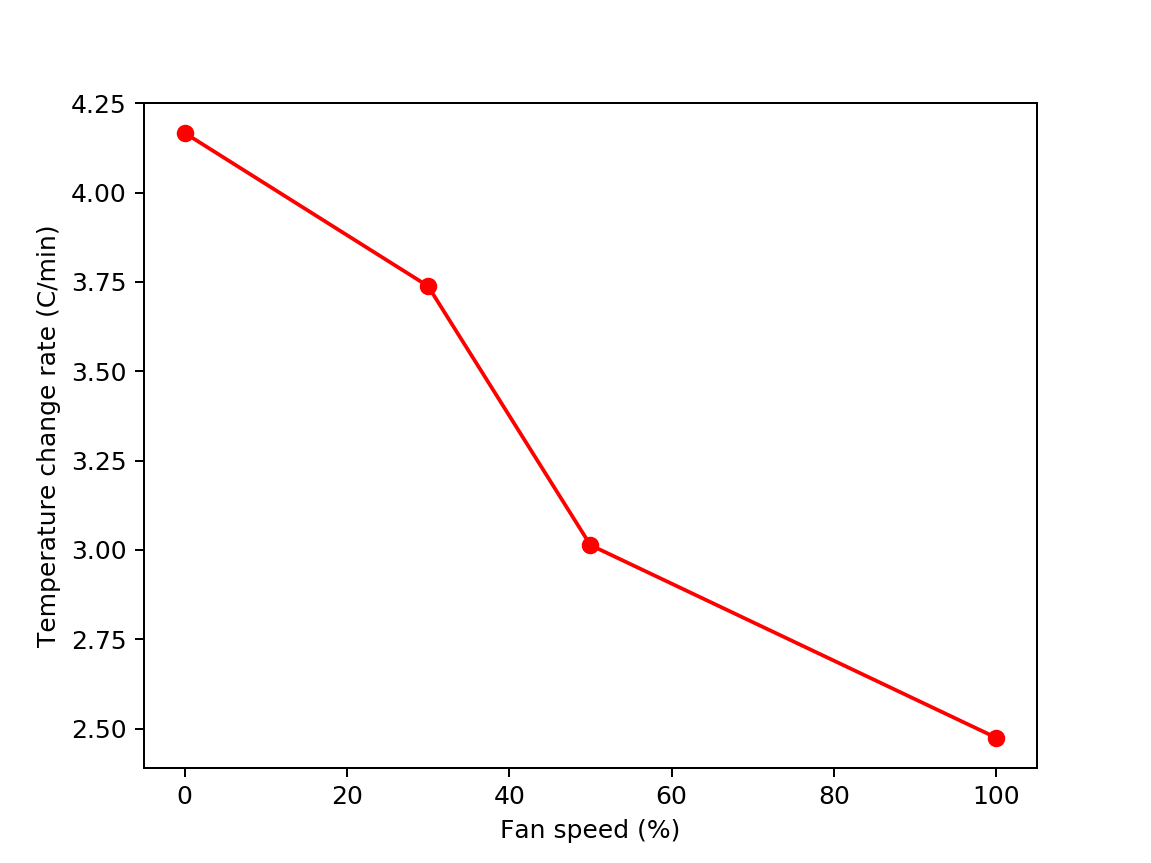

In [28]:
# Duct installed, No fan: -0.03684551
# No fan no duct (enclosure only): -0.0593734
# Duct installed + fan ON: -0.02263496
# Duct installed, Fan OFF: -0.03752431
# Enclosure only (Bigger Power supply): -0.06358272314324771
# ENclosure only (Smaller power supply): -0.0630065451067738
# Enclosure only (with Insulation): -0.07698356904560058


# Testing effects of fan-speed
# Fan + Duct: Fan speed=0 : -0.06945523464552782 C/s
# Fan + Duct: Fan speed=30: -0.062306531037606624 C/s
# Fan + Duct: Fan speed=50: -0.05022580126814528 C/s
# Fan + Duct: Fan speed=100: -0.04123832816494875 C/s
        
        
fan_speed = [0, 30, 50, 100]
temp_rate= 60*np.array([-0.06945523464552782, -0.062306531037606624, -0.05022580126814528, -0.04123832816494875])

plt.figure()
plt.plot(fan_speed, -temp_rate, 'ro-')
plt.xlabel('Fan speed (%)')
plt.ylabel('Temperature change rate (C/min)')
plt.savefig('Temp change rate vs fan speed.png', dpi = 300)
plt.show()

In [33]:
# Heat transfer calculations
Cp = 1 # 1kJ/kg K
rho_air = 1.22 #
Volume = 0.141 # m^3
Delta_T = 4
Time = 60

In [34]:
total_heat = lambda volume, delta_t: 1000*rho_air*volume*Cp*delta_t # heat in Joules

In [35]:
heat_transfer_rate = total_heat(Volume, Delta_T)/Time

In [36]:
print('Heat transfer rate: {} W'.format(heat_transfer_rate))

Heat transfer rate: 11.467999999999998 W


In [ ]:
# DeepCool Heat transfer rate: 1.8435555555555558 W
# ClimateRite (full microscope chamber): 2.1502499999999998 W
# ClimateRite (full microscope chamber): 3.4403999999999995 W
